## Week 12: Lecture 2

Remember that we can use hypothesis testing to compare a sample and a population. We calculate p-values to help assess the observed test statistic. If the observed test statistic was too small or too large compared to the simulated test statistics then we would reject the null hypothesis. We compare the p-value to a level such as 

- 1% or 5% for the left tail 
- 95% or 99% for the right tail 

The level indicates a rejection region consisting of small values or large values. We should think of a confidence interval like an acceptance region. Following an exercise about statistics 

- median 
- proportions 
- maximum 
- mean

we will use bootstrap resampling to generate confidence intervals for hypothesis testing. 

In [1]:
# some data science packages

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Calculating Statistics)

Suppose we want to study a population consisting of objects labeled 1 to `N`. Here we will take `N=100`. In Lab 8 you will take `N=150`.

In [2]:
population = np.arange(1,101,1)

sample_size = 10 
sample = sample_without_replacement(sample_size, population)
sample

array([47, 43, 58, 23,  2, 26, 60, 66, 83, 15])

Note that we have generated a sample of 10% of the population at random without replacement.

**(a)** Compute the median of sample. Compare to `calculate_percentile(sample, 50)`

In [3]:
# sort the data 

sample_sorted = sorted(sample)

# determine the middle position

middle_entry = len(sample_sorted) / 2

# compute the median 

median = sample_sorted[int(middle_entry) - 1]

# compare the median 

median == calculate_percentile(sample, 50)

True

Generate a boxplot of the sample.

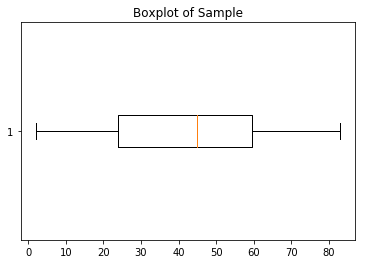

In [4]:
plt.boxplot(sample, vert = False)
plt.title("Boxplot of Sample");

**(b)** What is the proportion of even numbers? $$\displaystyle \frac{\text{Number of Even Values}}{\text{Total Number of Values}}$$ You should use `%` to check for even or odd. 

In [5]:
count_of_even = 0 

for number in sample:
    if 0 == number % 2:
        count_of_even = count_of_even + 1

proportion = count_of_even / len(sample)
proportion

0.5

**(c)** Find the maximum value in the sample

In [6]:
possible_maximum = sample[0]

for number in sample: 
    if number > possible_maximum:
        possible_maximum = number 

maximum = possible_maximum
maximum

83

**(d)** Compute the mean value in the sample.

In [7]:
sum_of_values = 0 

for number in sample: 
    sum_of_values = sum_of_values + number 

mean = sum_of_values / len(sample)
mean

42.3

**(e)** Generate a histogram of the sample. Indicate the median, max and mean 

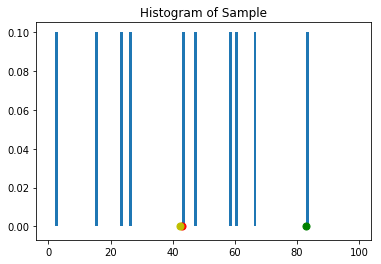

In [8]:
plt.hist(sample, density = True, bins = np.arange(1,100,1), rwidth=0.95, label = "Sample")

plt.scatter(median, 0, s = 50, c = "r", zorder = 2)
plt.scatter(maximum, 0, s = 50, c = "g", zorder = 2)
plt.scatter(mean, 0, s = 50, c = "y", zorder = 2)

plt.title('Histogram of Sample');

Note that the median and the mean are different

- median is the middle value 
- mean is the balance point 

The sample is not symmetric. With large values to the right, the mean gets moved above the median.

### Example (Confidence Intervals)

We want to study the dataset from the Child Health and Development Survey about infants. Remember that we have 1174 rows and 6 columns 

- Weight of baby in ounces
- Number of days between conception and delivery 
- Age of mother
- Height of mother in inches
- Weight of mother in pounds
- Smoking status

Note that `Maternal Smoker` contains boolean values `True` and `False`. 

In [38]:
births = pd.read_csv('baby.csv')
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


We will use bootstrap resampling to test three hypothesis about the population. We will generate confidence intervals to decide between rejecting or failing to reject the null hypothesis.

##### Proportion of Maternal Smokers

We can calculate the proportion of smokers. 

In [39]:
smoke_or_not_smoke = []

for boolean in births["Maternal Smoker"]:
    if boolean == True:
        smoke_or_not_smoke.append(1)
    else: 
        smoke_or_not_smoke.append(0)
        
number_smokers = sum(smoke_or_not_smoke)

proportion_smokers = number_smokers / len(births)
proportion_smokers

0.3909710391822828

We learn that about 40% of mothers are smokers. Note that we can use a trick to calculate the proportion. The `sum` function converts `True` to 1 and `False` to 0. 

In [40]:
observed_proportion = sum(births["Maternal Smoker"]) / len(births)
observed_proportion

0.3909710391822828

We can use a hypothesis test to make guesses about the proportion of smoking mothers in the population. 

- Null Hypothesis: 40% of expecting mothers in the population are smokers. We should attribute any variation in the proportion among samples to randomness.
- Alternative Hypothesis: The proportion of expecting mothers in the population is not 40%.

Here the test statistic is the proportion of smokers. We can generate 1000 resamples from the dataset.

In [42]:
replications = 1000
resample_size = len(births)

estimates_smokers = []
for replication in range(replications):
    resample = sample_with_replacement(resample_size, births["Maternal Smoker"])
    
    resample_proportion = sum(resample) / len(births)
    estimates_smokers.append(resample_proportion)

For each resample we calculate the proportion of the smokers. We can calculate the confidence interval containing 90% of the data by determing the 5th percentile and 95th percentile. 

In [43]:
percentile_5 = calculate_percentile(estimates_smokers, 5)
percentile_95 = calculate_percentile(estimates_smokers, 95)

null_hypothesis_proportion = 0.4

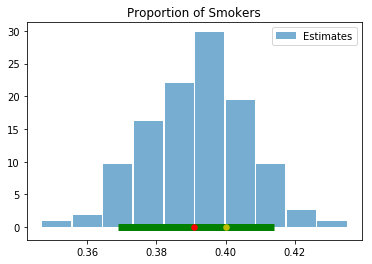

In [44]:
plt.hist(estimates_smokers, density = True, alpha = 0.6, rwidth=0.95, label = "Estimates")
plt.scatter(observed_proportion, 0, s = 30, c = "r", zorder = 20)
plt.scatter(null_hypothesis_proportion, 0, s = 30, c = "y", zorder = 20)

plt.hlines(y = 0, xmin = percentile_5, xmax = percentile_95, lw = 7, color = "green", zorder = 10)
plt.legend()
plt.title('Proportion of Smokers');

So we would fail to reject the null hypothesis.

##### Maximum Ratio of Birth Weight to Gestational Days

Doctors might want to estimate the birth weight befor delivery. To compare gestational days and birth weight, we can take a ratio 

$$\displaystyle \frac{\text{birth weight}}{\text{gestational days}} $$

Here we want to estimate the maximum. We can add another column to the table with the ratio.

In [45]:
births["Ratio Weight to Days"] = births["Birth Weight"] / births["Gestational Days"]
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,Ratio Weight to Days
0,120,284,27,62,100,False,0.422535
1,113,282,33,64,135,False,0.400709
2,128,279,28,64,115,True,0.458781
3,108,282,23,67,125,True,0.382979
4,136,286,25,62,93,False,0.475524
...,...,...,...,...,...,...,...
1169,113,275,27,60,100,False,0.410909
1170,128,265,24,67,120,False,0.483019
1171,130,291,30,65,150,True,0.446735
1172,125,281,21,65,110,False,0.444840


Now we can compute the maximum.

In [46]:
observed_maximum = max(births["Ratio Weight to Days"])
observed_maximum

0.7837837837837838

We learn that 0.78 is the maximum ratio. We can use a hypothesis test to make guesses about the proportion of the ratio in the population. 

- Null Hypothesis: The maximum ratio of birth weight in ounces to gestational days is 0.78 in the population of mothers. We should attribute any variation in the maximum ratio among samples to randomness.
- Alternative Hypothesis: The maximum ratio is not 0.78.

Here the test statistic is the maximum ratio. We can generate 1000 resamples from the dataset.

In [48]:
replications = 1000
resample_size = len(births)

estimates_max = []
for replication in range(replications):
    resample = sample_with_replacement(resample_size, births["Ratio Weight to Days"])
    
    resample_max = max(resample)
    estimates_max.append(resample_max)

For each resample we calculate the maximum ratio of weight to days. We can calculate the confidence interval containing 90% of the data by determing the 5th percentile and 95th percentile. 

In [49]:
percentile_5 = calculate_percentile(estimates_max, 5)
percentile_95 = calculate_percentile(estimates_max, 95)

null_hypothesis_max = 0.78

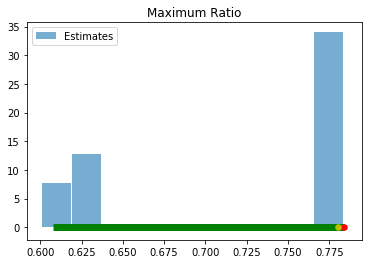

In [50]:
plt.hist(estimates_max, density = True, alpha = 0.6, rwidth=0.95, label = "Estimates")
plt.scatter(observed_maximum, 0, s = 30, c = "r", zorder = 20)
plt.scatter(null_hypothesis_max, 0, s = 30, c = "y", zorder = 20)

plt.hlines(y = 0, xmin = percentile_5, xmax = percentile_95, lw = 7, color = "green", zorder = 10)
plt.legend()
plt.title('Maximum Ratio');

Remember that we want to estimate a parameter in the population. 

> What is the maximum ratio between birth weight and gestational days among the population of mother? 

While we can try to use hypothesis testing with confidence intervals based on bootstrap resampling, we should not use the maximum of the resample to estimate the parameter. While it seems sensible to estimate a maximum in the population with a maximum in the resample, the maximum of the resamples can never exceed the maximum of the sample. 

So we get nothing from resampling. In Lab 8 you will explore another statistic for estimating the maximum based on means. The mean works well with bootstrap resampling. 

##### Average Maternal Age

We could try to determine the average age of a mother in the population. 

We learn that about 40% of mothers are smokers. Note that we can use a trick to calculate the proportion. The `sum` function converts `True` to 1 and `False` to 0. 

In [51]:
observed_average = sum(births["Maternal Age"]) / len(births)
observed_average

27.228279386712096

We can use a hypothesis test to make guesses about the proportion of smoking mothers in the population. 

- Null Hypothesis: The average age of expecting mothers in the population is 28. We should attribute any variation in the average among samples to randomness.
- Alternative Hypothesis: The average age of expecting mothers in the population is not 28.

Here the test statistic is the average age. We can generate 1000 resamples from the dataset.

In [52]:
replications = 1000
resample_size = len(births)

estimates_age = []
for replication in range(replications):
    resample = sample_with_replacement(resample_size, births["Maternal Age"])
    
    resample_proportion = sum(resample) / len(births)   # note that we did not change this line because we can think of proportions like averages!
    estimates_age.append(resample_proportion)

For each resample we calculate the proportion of the smokers. We can calculate the confidence interval containing 90% of the data by determing the 5th percentile and 95th percentile. 

In [53]:
percentile_5 = calculate_percentile(estimates_age, 5)
percentile_95 = calculate_percentile(estimates_age, 95)

null_hypothesis_average = 28

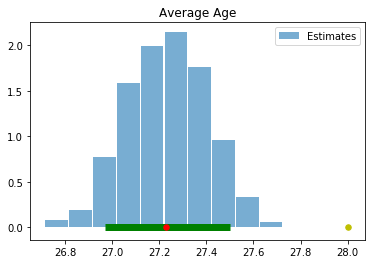

In [54]:
plt.hist(estimates_age, density = True, alpha = 0.6, rwidth=0.95, label = "Estimates")
plt.scatter(observed_average, 0, s = 30, c = "r", zorder = 20)
plt.scatter(null_hypothesis_average, 0, s = 30, c = "y", zorder = 20)

plt.hlines(y = 0, xmin = percentile_5, xmax = percentile_95, lw = 7, color = "green", zorder = 10)
plt.legend()
plt.title('Average Age');

So we would reject the null hypothesis. Note that the p-value would be 0.

In [55]:
1 - calculate_pvalue(null_hypothesis_average, estimates_age)

0.0

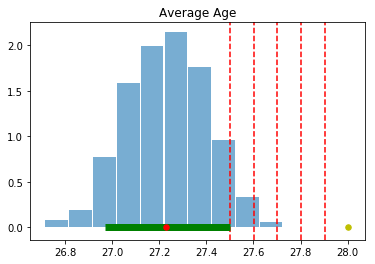

In [56]:
plt.hist(estimates_age, density = True, alpha = 0.6, rwidth=0.95, label = "Estimates")
plt.scatter(observed_average, 0, s = 30, c = "r", zorder = 20)
plt.scatter(null_hypothesis_average, 0, s = 30, c = "y", zorder = 20)
plt.hlines(y = 0, xmin = percentile_5, xmax = percentile_95, lw = 7, color = "green", zorder = 10)

for x_value in np.arange(percentile_95, null_hypothesis_average, 0.1):
    plt.axvline(x = x_value, color = "red", linestyle = "dashed")
    
plt.title('Average Age');

### Example (Standard Deviation Bound)

We have tried to understand differences in estimates between samples. While some statistics were not suitable for estimates, other statitics seem to give accurate estimates. We want to work with statistics about a sample that equal on average the parameter in the population. Here we mean over many samples and resamples.  

The mean provides accurate estimates. Regardless of the population, we know properties about the average. In particular we can bound the difference between numbers and their average for any collection of numbers. 

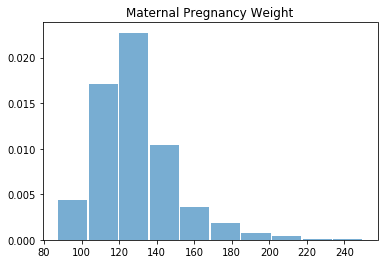

In [57]:
births = pd.read_csv('baby.csv')

plt.hist(births['Maternal Pregnancy Weight'], density = True, alpha = 0.6, rwidth=0.95)
plt.title('Maternal Pregnancy Weight');

Among the columns in the table, we can calculate the mean and standard deviation of `Maternal Pregnancy Weight`.

In [58]:
maternal_weight = births['Maternal Pregnancy Weight']
mean_maternal_weight = np.mean(maternal_weight)
standard_deviation_maternal_weight = np.std(maternal_weight)

print(f"Mean is {mean_maternal_weight} \nStandard Deviation is {standard_deviation_maternal_weight}")

Mean is 128.4787052810903 
Standard Deviation is 20.725449704280415


How many records of `Maternal Pregnancy Weight` are within three standard deviations of the mean

$$\text{Mean} - 3 * \text{Standard Deviation} \leq \text{Weight} \leq \text{Mean} + 3 * \text{Standard Deviation}$$

If standard deviation measures average distance to the mean, then three standard deviations should probably capture much of the variation in the numbers.

In [59]:
lower_bound = mean_maternal_weight - 3 * standard_deviation_maternal_weight
upper_bound = mean_maternal_weight + 3 * standard_deviation_maternal_weight

within_three = []
for weight in births["Maternal Pregnancy Weight"]:    
    if lower_bound <= weight <= upper_bound:
        within_three.append(1)
    else:
        within_three.append(0)
    
fraction_within_three = sum(within_three) / len(within_three)
fraction_within_three

0.9863713798977853

We learn that 98% of records of `Maternal Pregnancy Weight` lie within three standard deviations. The **standard deviation rule** shows that the proportion of records within 3 standard deviations of the mean is at least $$1 - \displaystyle \frac{1}{3^2}$$ We can calculate the number.

In [60]:
1 - 1/(3**2)

0.8888888888888888

So we learn that the lower bound is not an equality.

In [61]:
percentile_6 = calculate_percentile(births["Maternal Pregnancy Weight"], 6)
percentile_94 = calculate_percentile(births["Maternal Pregnancy Weight"], 94)

Since the bound applies to 88% of the data, we can compute the 6th percentile and the 94th percentile. Now we can compare. 

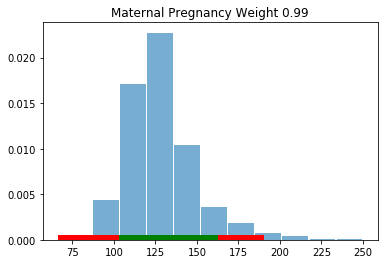

In [62]:
plt.hist(births['Maternal Pregnancy Weight'], density = True, alpha = 0.6, rwidth=0.95)

plt.hlines(y = 0, xmin = lower_bound, xmax = upper_bound, lw = 10, color = "red", zorder = 5)
plt.hlines(y = 0, xmin = percentile_6, xmax = percentile_94, lw = 10, color = "green", zorder = 10)

plt.title(f'Maternal Pregnancy Weight {fraction_within_three:.2f}');

We can check for the other columns.

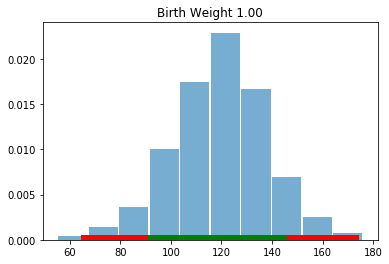

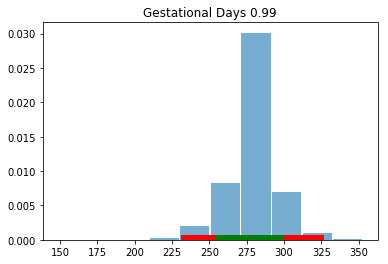

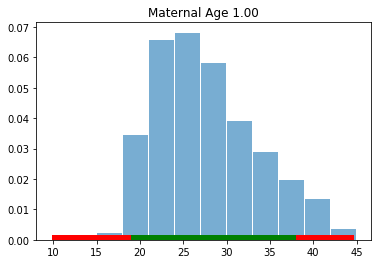

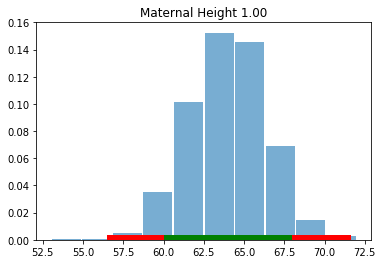

In [63]:
plot_standard_deviation_bounds(births)

Remember that standard units come from shifting by the mean and dividing by the standard deviation. Standard units give us a convenient form to apply the standard deviation bound. 

In [32]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

We can convert `Maternal Pregnancy Weight`.

In [35]:
weight_converted = standard_units(births["Maternal Pregnancy Weight"])

Note that the histogram looks more symmetric.

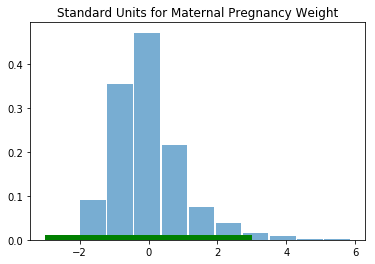

In [37]:
plt.hist(weight_converted, density = True, alpha = 0.6, rwidth=0.95)
plt.hlines(y = 0, xmin = -3, xmax = 3, lw = 10, color = "green", zorder = 10)

plt.title('Standard Units for Maternal Pregnancy Weight');